1. Importing libraries 

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, os,random
import eda_helper_functions

Setting display options

In [3]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

2. Reading the data

In [4]:
PROJECT_DIR  = "/Users/abhisheksaurav/Desktop/real_estate_project/"
DATA_DIR = "Data Collection/Data/City/chandigarh/cleaned_data"

In [5]:
def get_data(name):
    file_name = "{}.csv".format(name)
    file_path = os.path.join(PROJECT_DIR, DATA_DIR, file_name)
    return pd.read_csv(file_path)

In [6]:
data = get_data("gurgaon_properties_cleaned_v2")

3. Premilinary Analysis of the data 

In [7]:
(
    data 
    .sample(3)
)

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_score
3651,house,independent,sector 36,0.66,7168.0,921.0,Built Up area: 823 (76.46 sq.m.),2,2,3,4.0,NaN,New Property,NaN,823.0,NaN,0,0,0,0,0,0,0
3649,flat,vatika city homes,sector 83,1.00,5747.0,1740.0,Super Built up area 1740(161.65 sq.m.),3,3,2,2.0,south-east,Relatively New,1740.0,NaN,NaN,0,0,1,0,0,2,174
2055,flat,puri the aravallis,sector 61,3.87,17200.0,2250.0,Super Built up area 2250(209.03 sq.m.)Carpet area: 1249.65 sq.ft. (116.1 sq.m.),3,4,3+,21.0,east,Under Construction,2250.0,NaN,1249.65,0,1,0,0,0,0,58


In [8]:
# checking the shape of the data 
(
    data 
    .shape
)

(3942, 23)

- data has `3942` rows and `23` columns 

In [9]:
# checking the datatypes 

(
    data 
    .info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3942 entries, 0 to 3941
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property type        3942 non-null   object 
 1   society              3941 non-null   object 
 2   sector               3942 non-null   object 
 3   price                3922 non-null   float64
 4   price_per_sq_ft      3922 non-null   float64
 5   area                 3922 non-null   float64
 6   areaWithType         3942 non-null   object 
 7   bedRoom              3942 non-null   int64  
 8   bathroom             3942 non-null   int64  
 9   balcony              3942 non-null   object 
 10  floorNum             3940 non-null   float64
 11  facing               3651 non-null   object 
 12  agePossession        3942 non-null   object 
 13  super_built_up_area  1934 non-null   float64
 14  built_up_area        1829 non-null   float64
 15  carpet_area          2001 non-null   f

In [10]:
# checking for duplicate rows 

(
    data 
    .duplicated()
    .sum()
)

np.int64(129)

- data has around `129` duplicate rows
- dropping these duplicate rows 

In [11]:
(
    data 
    .drop_duplicates(inplace= True)
)

In [12]:
(
    data 
    .head()
)

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_score
0,house,independent,sector 31,4.25,26235.0,1620.0,Plot area 204(170.57 sq.m.)Built Up area: 200 sq.yards (167.23 sq.m.)Carpet area: 180 sq.yards (150.5 sq.m.),5,5,3+,3.0,North-East,Moderately Old,NaN,200.0,180.0,0,0,1,1,0,2,56
1,house,independent,sector 1,1.85,16003.0,1156.0,Carpet area: 1156 (107.4 sq.m.),4,3,2,3.0,NaN,undefined,NaN,NaN,1156.0,0,0,0,0,0,0,0
2,house,independent,sector 50,12.50,40611.0,3078.0,Plot area 342(285.96 sq.m.),6,5,3,4.0,East,Moderately Old,NaN,3078.0,NaN,1,1,0,1,0,2,23
3,flat,aipl zen residences,sector 70,1.82,10996.0,1655.0,Super Built up area 1655(153.75 sq.m.)Built Up area: 1600 sq.ft. (148.64 sq.m.)Carpet area: 1550 sq.ft. (144 sq.m.),3,3,3,12.0,south,Relatively New,1655.0,1600.0,1550.0,0,0,0,0,0,0,108
4,flat,the close north,sector 50,2.51,11992.0,2093.0,Super Built up area 2093(194.45 sq.m.),3,3,3,11.0,north-east,Moderately Old,2093.0,NaN,NaN,0,0,1,1,0,2,109


## 5. Univariate Analysis

5.1 property_type

<Axes: xlabel='property type'>

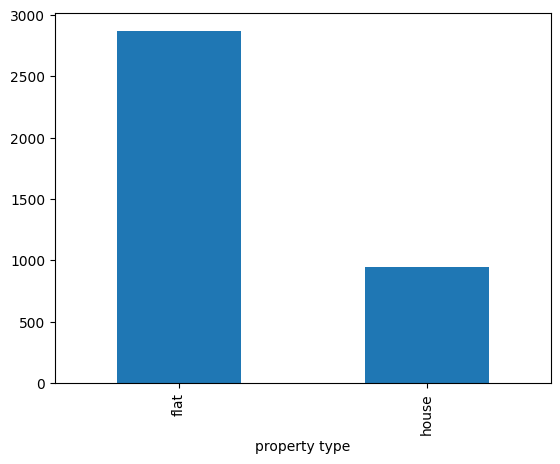

In [13]:
(
    data['property type']
    .value_counts()
    .plot(kind = 'bar')
)

In [14]:
(
    data['property type']
    .value_counts(normalize= True) * 100
)

property type
flat     75.242591
house    24.757409
Name: proportion, dtype: float64

In [15]:
(
    data['property type']
    .isnull() 
    .sum()
)

np.int64(0)

Observation 
- flats are in majority with around 75% of the data and there are less numbers of houses
- there are no missing values in the data 

5.2 Society

In [16]:
# quick glance 

(
    data
    .society
    .sample(10)
)

2649                     independent
2070            emaar gurgaon greens
3069                       ild grand
2791          vatika lifestyle homes
3368                dlf the skycourt
3669    sushant lok 1 builder floors
2809               aqua front towers
2050                   godrej summit
683        signature global city 63a
2750                     independent
Name: society, dtype: object

In [17]:
(
    data 
    .society
    .value_counts()
)

society
independent                                          558
tulip violet                                          75
ss the leaf                                           73
shapoorji pallonji joyville gurugram                  42
dlf new town heights                                  41
signature global park                                 35
shree vardhman victoria                               34
emaar mgf emerald floors premier                      32
smart world orchard                                   32
paras dews                                            31
dlf the ultima                                        31
dlf regal gardens                                     30
m3m woodshire                                         30
shree vardhman flora                                  29
la vida by tata housing                               28
smart world gems                                      28
signature global solera                               27
godrej nature plus     

In [18]:
(
    data 
    .society
    .nunique()
)

722

Observation
- this column has high cardinality i.e. there are almost 722 categories. 
- out of 722 categories of apartments 50% of the data is coming from 75 apartments i.e almost 75 apartments have multiple flats up for sale and that's why it is coveering almost 50% of the data 

In [19]:
(
    data[data.society != 'independent']
    .society
    .value_counts(normalize= True)
    .cumsum()
    .head(75)
)

society
tulip violet                            0.023049
ss the leaf                             0.045482
shapoorji pallonji joyville gurugram    0.058390
dlf new town heights                    0.070990
signature global park                   0.081746
shree vardhman victoria                 0.092194
emaar mgf emerald floors premier        0.102028
smart world orchard                     0.111862
dlf the ultima                          0.121389
paras dews                              0.130916
m3m woodshire                           0.140135
dlf regal gardens                       0.149355
shree vardhman flora                    0.158267
smart world gems                        0.166872
la vida by tata housing                 0.175476
signature global solera                 0.183774
godrej nature plus                      0.192071
bptp terra                              0.199754
vatika gurgaon                          0.207130
experion the heartsong                  0.214505
tata primant

Observation
- out of 722 categories of apartments 50% of the data is coming from 75 apartments i.e almost 75 apartments have multiple flats up for sale and that's why it is coveering almost 50% of the data 

In [20]:
# creating bins for the number of flats in a apartment to check how many apartments have multiple flats vacant 

society_counts = (
    data 
    .society 
    .value_counts()
)

frequency_bins = {
    "Very High > 100": (society_counts > 100).sum(), 
    "High (50-100)": ((society_counts > 50) & (society_counts < 100)).sum(), 
    "Average (10-49)": ((society_counts > 10) & (society_counts < 50)).sum(), 
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(), 
    "Very Low (1)": (society_counts ==1).sum()
}

for key, value in frequency_bins.items():
    print("{}\t:\t{}".format(key, value))

Very High > 100	:	1
High (50-100)	:	2
Average (10-49)	:	86
Low (2-9)	:	287
Very Low (1)	:	340


Observation: 
- society column explains that: 
    - There are: 
        - 1 apartment with more 100 flats 
        - 2 apartments with 50-100 flats 
        - 86 apartments with 10-49 flats 
        - 287 apartments with 2-9 flats and 
        - 340 apartments with just one flat 

<Axes: xlabel='society'>

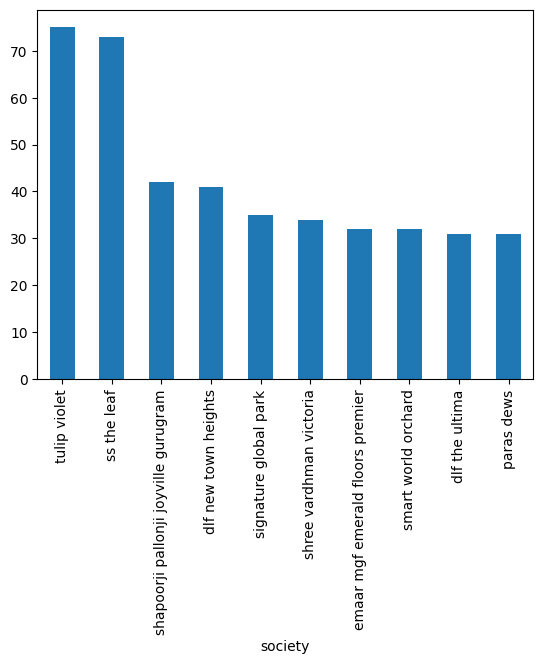

In [21]:
# top 10 societies 

(
    data[data['society'] != 'independent']
    .society
    .value_counts()
    .head(10)
    .plot(kind = 'bar')
    
)

In [22]:
# checking for missing values 

(
    data 
    .society
    .isna()
    .sum()
)

np.int64(1)

In [23]:
(
    data[data 
    .society
    .isnull()]
)

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_score
1030,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,No,NaN,na,Under Construction,NaN,1625.0,NaN,0,0,0,0,0,0,0


In [24]:
def cat_col_summary(df, var):
    print("="*50)
    # quick glance 
    print(f"Quick glance of {var}")
    print("="*15)

    print(df[var].sample(10))
    print("="*50)



    # cardinality check 
    print(f"Cardinality in the {var} column: ")
    print(df[var].nunique())
    print("="*50)

    # value coutnts
    print(df[var].value_counts())

    # missing values 
    print(f"Number of missing values in the {var} column: ")
    null_values = df[var].isnull()
    print(null_values.sum())
    print("="*50)

    # print("Frequency bins")
    # counts = (
    # df[var] 
    # .value_counts()
    # )

    # frequency_bins = {
    #     "Very High > 100": (counts > 100).sum(), 
    #     "High (50-100)": ((counts > 50) & (counts < 100)).sum(), 
    #     "Average (10-49)": ((counts > 10) & (counts < 50)).sum(), 
    #     "Low (2-9)": ((counts > 1) & (counts < 10)).sum(), 
    #     "Very Low (1)": (counts ==1).sum()
    # }

    # for key, value in frequency_bins.items():
    #     print("{}\t:\t{}".format(key, value))

        # bar chart 
    plt.figure(figsize=(10, 3))
    # plt.subplot(1, 2 , 1)
    df[var].value_counts().head(10).plot(kind = 'bar', title = f"Top categories in {var}")

    # # pie chart
    # plt.subplot(1, 2, 2)
    # plt.pie(data['bedRoom'].value_counts(normalize= True).head(), autopct= "%0.2f%%")
    # plt.show()
    print("="*100)


    

Quick glance of society
2688                   dlf city plot phase 4
3203                              sobha city
1283                   ansals florence villa
1785                pareena coban residences
2504                             ss the leaf
865                              independent
2441    shapoorji pallonji joyville gurugram
3260                          raheja revanta
3419                        dlf city phase 1
3469                    dlf new town heights
Name: society, dtype: object
Cardinality in the society column: 
722
society
independent                                          558
tulip violet                                          75
ss the leaf                                           73
shapoorji pallonji joyville gurugram                  42
dlf new town heights                                  41
signature global park                                 35
shree vardhman victoria                               34
emaar mgf emerald floors premier                  

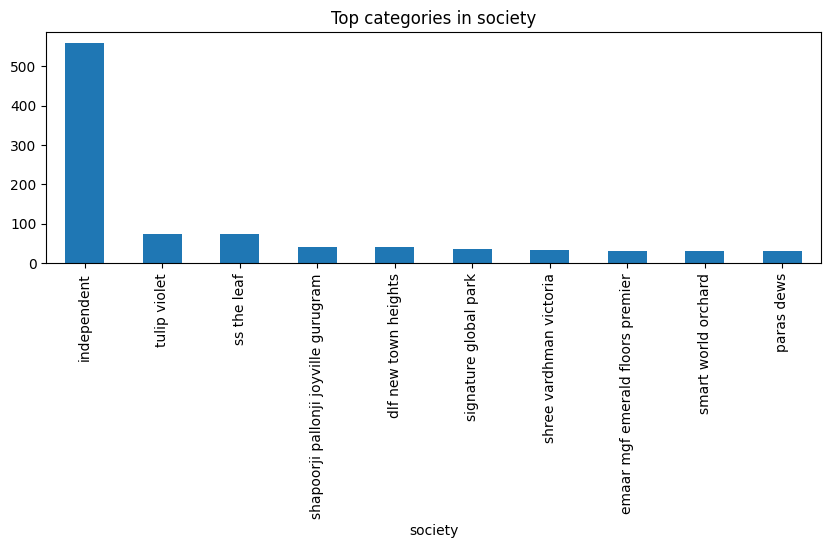

In [25]:
cat_col_summary(data, 'society')

Observation 
- flats are in majority with around 75% of the data and there are less numbers of houses
- there are no missing values in the data
- out of 722 categories of apartments 50% of the data is coming from 75 apartments i.e almost 75 apartments have multiple flats up for sale and that's why it is coveering almost 50% of the data 
- society column explains that: 
    - There are: 
        - 1 apartment with more 100 flats 
        - 2 apartments with 50-100 flats 
        - 86 apartments with 10-49 flats 
        - 287 apartments with 2-9 flats and 
        - 340 apartments with just one flat 
- there is one missing value 

5.2 Sector

Quick glance of sector
389      sector 37
1598     sector 11
3834    sector 112
2762    sector 103
261      sector 23
1244     sector 84
1920     sector 70
264      sector 85
266      sector 89
1772     sector 17
Name: sector, dtype: object
Cardinality in the sector column: 
103
sector
sector 163    154
sector 37     122
sector 85     108
sector 102    108
sector 70     105
sector 92     100
sector 69      93
sector 90      88
sector 109     88
sector 81      87
sector 65      87
sector 48      78
sector 79      77
sector 33      71
sector 50      69
sector 67      68
sector 83      68
sector 104     65
sector 95      63
sector 86      63
sector 108     60
sector 82      60
sector 107     60
sector 89      58
sector 23      57
sector 56      56
sector 3       56
sector 8       55
sector 9       55
sector 26      49
sector 84      49
sector 1       47
sector 66      45
sector 43      44
sector 113     43
sector 99      43
sector 25      42
sector 103     42
sector 61      41
sector 5   

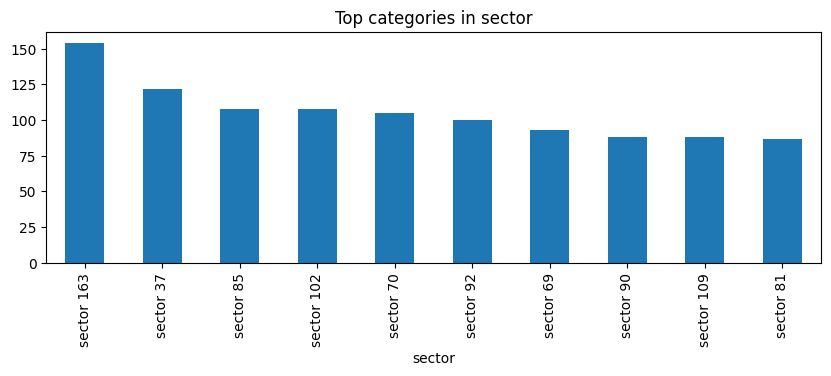

In [26]:
cat_col_summary(data, 'sector')

Observation: 
- There are 103 unique values in the `sectors`. 
- Frequency distribution of sectors: 
    - Very High > 100	:	5
    - High (50-100)	:	23
    - Average (10-49)	:	54
    - Low (2-9)	:	15
    - Very Low (1)	:	4
- there are 0 missing values in this column

5.3 Price

In [27]:
def num_col_summary(df, var):

    print("Quick Glance")
    print(df[var].sample(10))
    print("="*50)
    print()


    # 5 number summary 
    print("Basic summary of the data: ")
    print(df[var].describe())
    print("="*50)

    # skewness and kurtosis 
    print("Skewness: \t{:.2f} ".format(df[var].skew()))
    print("Kurtosis: \t{:.2f}".format(df[var].kurt()))
    print("="*50)

    # missing values 
    print("Number of missing values in the column: ")
    null_values = df[var].isnull()
    print(null_values.sum())
    print("="*50)

    # quantile analysis
    print("Quantile analysis")
    quantiles = df[var].quantile([0.01, 0.05, 0.95, 0.99])
    print(quantiles)

    # identification of outliers using the IQR method
    iqr = df[var].quantile(0.75) - df[var].quantile(0.25)
    print("IQR: ", iqr)
    print("="*50)
    print()

    # shapiro wilk test 
    from scipy import stats 
    alpha = 0.05
    sw_test = stats.shapiro(df[var].dropna().values)
    sw_statistic = sw_test.statistic
    sw_pvalue = sw_test.pvalue
    # print("Significance Leve: ", alpha)
    print("Step 1:Setting up the hypothesis.")
    print("Null hypothesis: Data is Normally Distributed")
    print("Alternate hypothesis: Data is Not Normally Distributed")
    print("Step 2: Setting up the significant level for the test.")
    print("Significance Level: ", alpha)
    print("Step 3: Performing the test.")
    print("Test Statistic: ", round(sw_statistic,4))
    print("Step 4: Calculating the p-value")
    print("Pvalue = ", round(sw_pvalue,9))
    print("Interpration")
    if sw_pvalue < alpha: 
        print(f"Since p-valeu is less than {alpha} we reject the null hypothesis at the significance level {alpha * 100}%")
        print(f"Conclusion: We conclude that the colleced sample data is not normally distributed")
    else: 
        print(f"Since p-valeu is greater than {alpha} we fail to reject the null hypothesis at the significance level {alpha * 100}%")
        print(f"Conclusion: We conclude that the colleced sample data is normally distributed")

    # plot
    plt.figure(figsize= (15, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], kde = True, bins = 50)
    plt.title("Distribution")

    # boxplot 
    plt.subplot(1, 2, 2)
    sns.boxplot(x =df[var], color= 'lightgreen')
    plt.title("Box and whiskers plot")

    # Adding frequency labels on top of each bar


    


Quick Glance
1625    2.40
3505    1.42
1271    3.40
2750    5.50
2695    1.60
2322    2.60
3213    0.55
1447    5.80
1746    0.25
1309    2.10
Name: price, dtype: float64

Basic summary of the data: 
count    3794.000000
mean        2.489170
std         2.943189
min         0.070000
25%         0.910000
50%         1.500000
75%         2.700000
max        31.500000
Name: price, dtype: float64
Skewness: 	3.33 
Kurtosis: 	15.46
Number of missing values in the column: 
19
Quantile analysis
0.01     0.2493
0.05     0.3700
0.95     8.4140
0.99    15.1280
Name: price, dtype: float64
IQR:  1.79

Step 1:Setting up the hypothesis.
Null hypothesis: Data is Normally Distributed
Alternate hypothesis: Data is Not Normally Distributed
Step 2: Setting up the significant level for the test.
Significance Level:  0.05
Step 3: Performing the test.
Test Statistic:  0.6442
Step 4: Calculating the p-value
Pvalue =  0.0
Interpration
Since p-valeu is less than 0.05 we reject the null hypothesis at the signifi

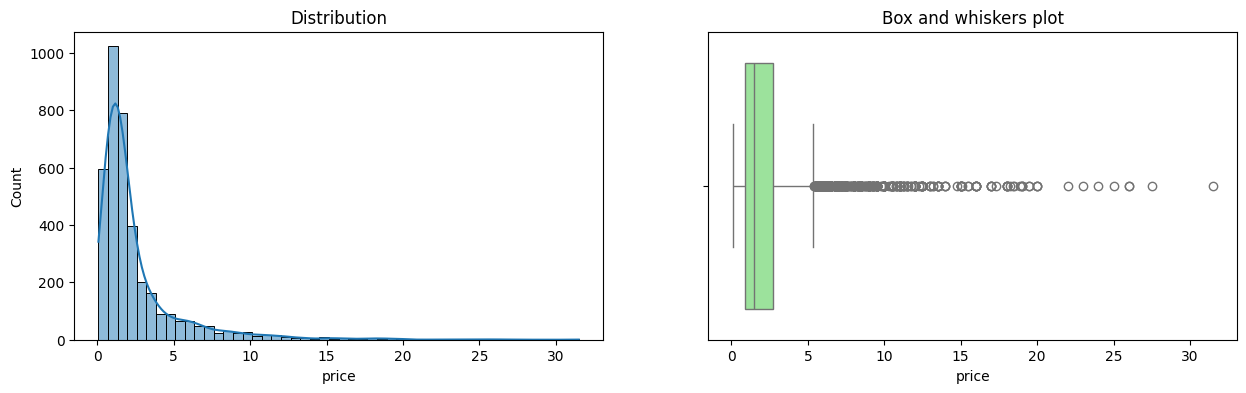

In [28]:
num_col_summary(data, 'price')

Observations:
- The average flat prices in gurgaon is almost 2.5 crores 
- std deviate of the price is 2.9 which shows there is lot of variance in the data 
- Min priced flat in gurgaon is around 7 lakh rupees 
- 25 % of the flats are priced around 91 lakhs 
- median flat prices is around 1.5 crores 

    - Visualization 
        - most costlies flat is priced around 31 crores due to which our data is right skewed. 
        - the price distribution is right skewed which means many flats are less priced and fewer flats are high priced 
        - Box and whisker plot shows the spread of the data and potential outliers. Properites above the price 10 crores can be considered as outliers and they lie beyond the upper whisker of the plot 
        - some flat are priced above the 20-25 crores which can create the bias in our machine learning model 
        - Histogram indicates that most flat prices are below 5 crores while fewer properies prices goes beyond 10 crores 
        
- There are 19 missising values in our data 
- Skewness of 3 is an indication that data is positively skewed. This means that the data is skewed to the right and it has longer right tail which aligns with our observation from the histogram as well. 
- Kurtosis is 15.46. A kurtosis value greater than 3 is an indication that distribution has heavier tails and more outliers compared to the normal distribution. 
- Based on quantile analysis: 
    - 1 % of the flats are priced below 0.25 crores 
    - 5% quantile: 5% of the properties are below 0.37 crores 
    - 95% quantile: 95% of the properties are below 8.41 crores 
    - 99% quantile: 99% of the prorperties are below 15 crores  

In [29]:
# outlier analysis using iqr 

q1 = data['price'].quantile(0.25)
q3 = data['price'].quantile(0.75)
iqr =q3-q1
print("IQR: ", iqr)

lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)
print("lower bound: ", lower_bound, ',', 'upper bound: ', upper_bound)

outliers = data[(data.price < lower_bound) | (data.price > upper_bound)]


IQR:  1.79
lower bound:  -1.775 , upper bound:  5.385


In [30]:
outliers.shape

(430, 23)

In [31]:
outliers.price.describe()

count    430.000000
mean       9.181581
std        4.077361
min        5.400000
25%        6.300000
50%        8.000000
75%       10.557500
max       31.500000
Name: price, dtype: float64

Outlier analysis: 
- Ther are 430 rows which are indicating the presence of outliers. 
- outliers have an average price around 9.18 crores 
- the range of outliers is from 5.40 crores to 31.5 crores 


<Axes: xlabel='price'>

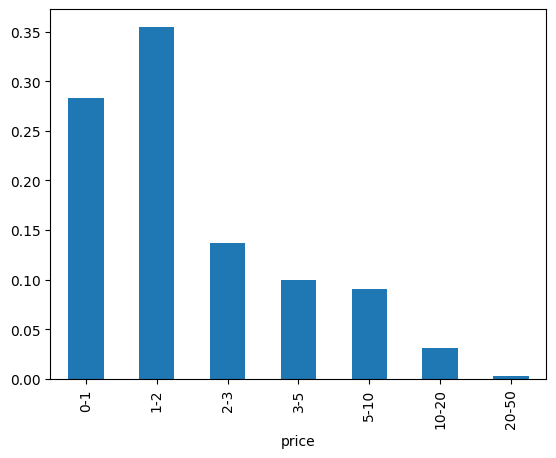

In [32]:
# price binning

bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ['0-1', '1-2', '2-3', '3-5', '5-10', '10-20', '20-50']

(
    pd.cut(data['price'], bins = bins, labels= bin_labels, right= False)
    .value_counts(normalize= True)
    .sort_index()
    .plot(kind = 'bar')
    )



Observation 
- The majority of the properties are priced in the range of `0-3` crores. 
- There is a significant drop in the number of properites priced above 5 crores. 


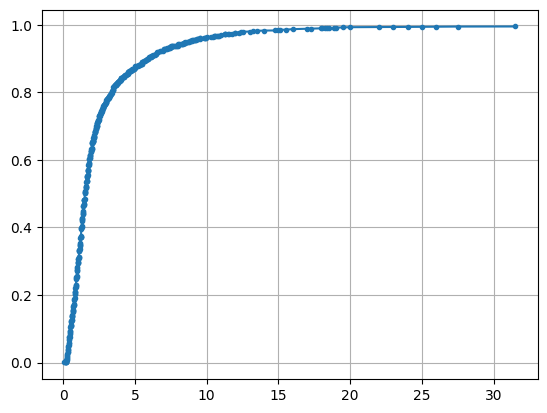

In [33]:
# ecdf analysis

ecdf = data.price.value_counts().sort_index().cumsum() / (len(data.price))
plt.plot(ecdf.index, ecdf, marker = '.', linestyle = None)
plt.grid()

- Around 85% of the data falls below the 5 crores 
- Around 90% of the data is below 10 crores

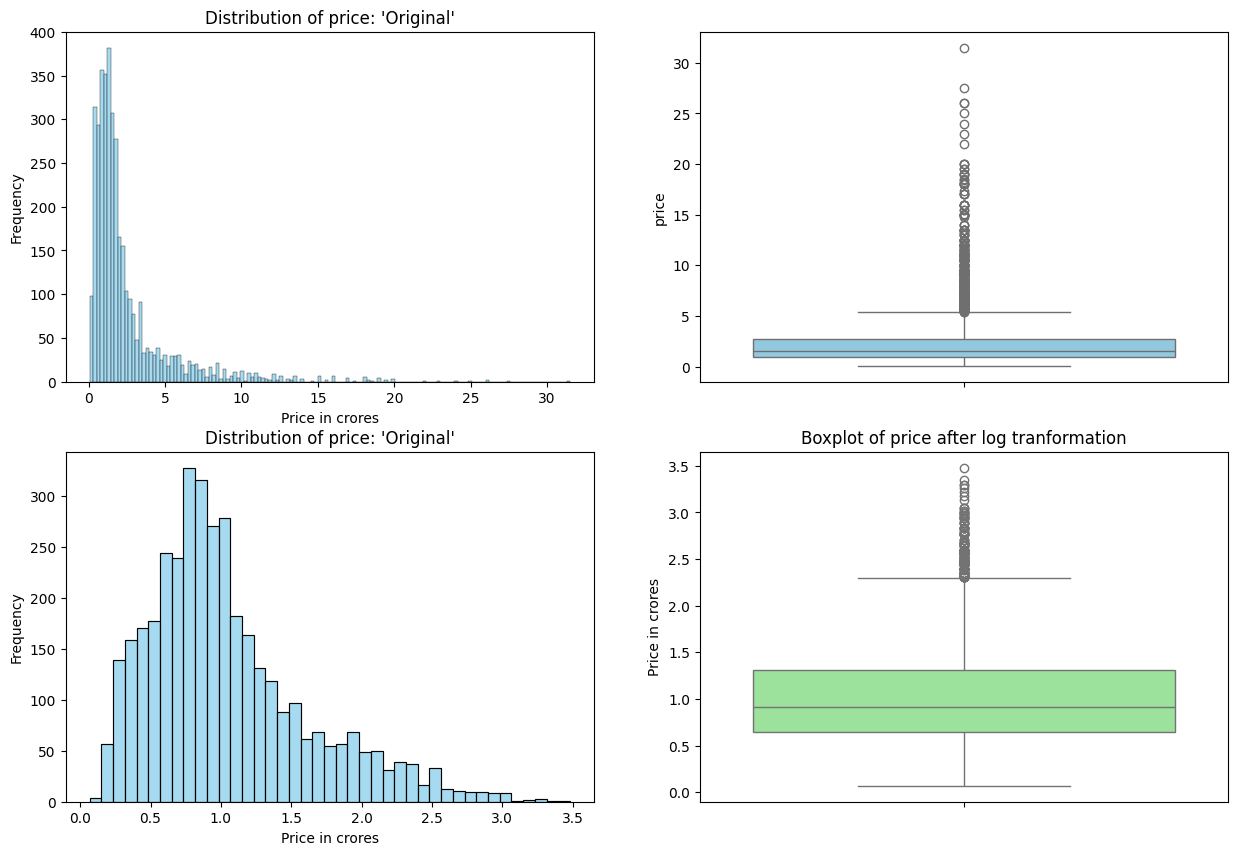

In [34]:
# now since the price column is right skewed we will apply transformation techniques to make it closer to the normal distribution. 

# distribution without log transformation
# histogram
plt.figure(figsize= (15, 10))

plt.subplot(2, 2 , 1)
sns.histplot(data['price'], color= 'skyblue')
plt.title("Distribution of price: 'Original'")
plt.xlabel("Price in crores")
plt.ylabel("Frequency")

plt.subplot(2, 2, 2)
sns.boxplot(data['price'], color= 'skyblue')


# distribution with log transformation
price_log_trasformed = np.log1p(data['price'])
plt.subplot(2, 2, 3)
sns.histplot(price_log_trasformed, color= 'skyblue')
plt.title("Distribution of price: 'Original'")
plt.xlabel("Price in crores")
plt.ylabel("Frequency")

# boxplot 
plt.subplot(2 ,2, 4)
sns.boxplot(price_log_trasformed, color= 'lightgreen')
plt.title("Boxplot of price after log tranformation")
plt.ylabel("Price in crores")

plt.show()


In [35]:
# shapiro wilk test to check if the log tranformation of the 'price' col has helped or not 

from scipy import stats 

alpha = 0.05 
sw_test, pvalue = stats.shapiro(np.log1p(data['price'].dropna().values))
print(f"Test Statistic: {sw_test}")
print(f"P values = {round(pvalue,4)}")
if pvalue < alpha:
    print("Data is not normally distributed")
else: 
    print("Data is normally distributed")

Test Statistic: 0.9232291119491288
P values = 0.0
Data is not normally distributed


Observtion: 
- 1. After tranforming the data, the high values of the prices are signficant reduced now but it's still it is not able to get closer to the normal distribution. 
- 2. This is verified from the histogram and the shapiro wilk test as well. 
- 3. But this log tranformation significantly reduced the number of outliers which can be verfied with the boxplot. 
- 4. Log transformation will help us to get the improved model performance. 
- 5. Due to less number of data points present in the data we can't remove the outliers. So, we are using log tranformation techniques to tranform the data into normal-like and compressing the outliers using log tranformation. 

5.4 price_per_sq_ft

Quick Glance
3317     7590.0
793      9182.0
82      33129.0
1432     8410.0
2503     8487.0
620     21605.0
1679    13495.0
1865     6382.0
1475     6666.0
3378    12401.0
Name: price_per_sq_ft, dtype: float64

Basic summary of the data: 
count      3794.000000
mean      13897.771481
std       22931.157123
min           2.000000
25%        6800.000000
50%        9000.000000
75%       13769.000000
max      600000.000000
Name: price_per_sq_ft, dtype: float64
Skewness: 	11.21 
Kurtosis: 	184.88
Number of missing values in the column: 
19
Quantile analysis
0.01     3151.30
0.05     4666.00
0.95    33333.00
0.99    91045.36
Name: price_per_sq_ft, dtype: float64
IQR:  6969.0

Step 1:Setting up the hypothesis.
Null hypothesis: Data is Normally Distributed
Alternate hypothesis: Data is Not Normally Distributed
Step 2: Setting up the significant level for the test.
Significance Level:  0.05
Step 3: Performing the test.
Test Statistic:  0.2985
Step 4: Calculating the p-value
Pvalue =  0.0
Inter

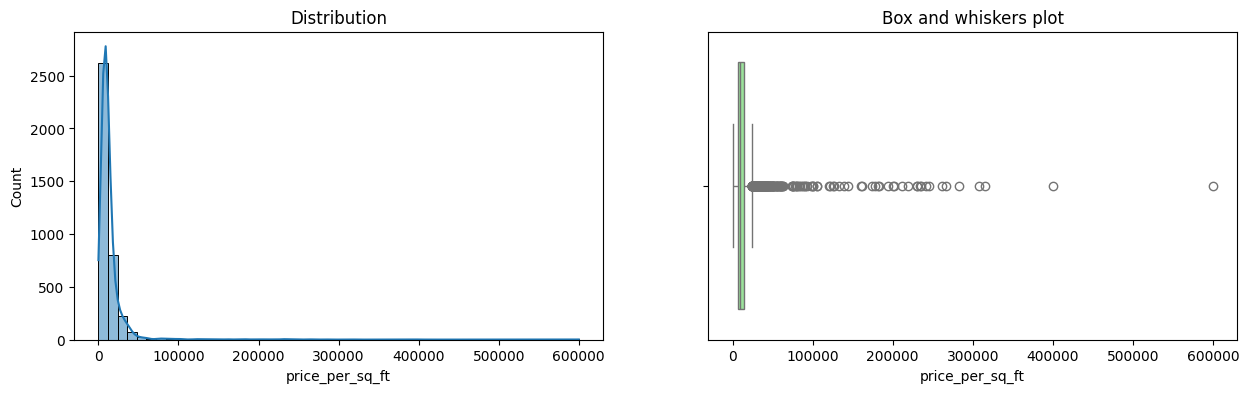

In [36]:
num_col_summary(data, "price_per_sq_ft")

In [37]:
# anderson-darling test to check the tail behaviour 

import scipy.stats as stats

# Performing Anderson-Darling test
result = stats.anderson(data['price_per_sq_ft'].dropna().values)

ad_test_stat = result.statistic
critical_values = result.critical_values
significance_levels = result.significance_level

print("Test Statistic:", ad_test_stat)
print("Critical Values:", critical_values)
print("Significance Levels:", significance_levels)

Test Statistic: 701.5902105870227
Critical Values: [0.575 0.655 0.786 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]


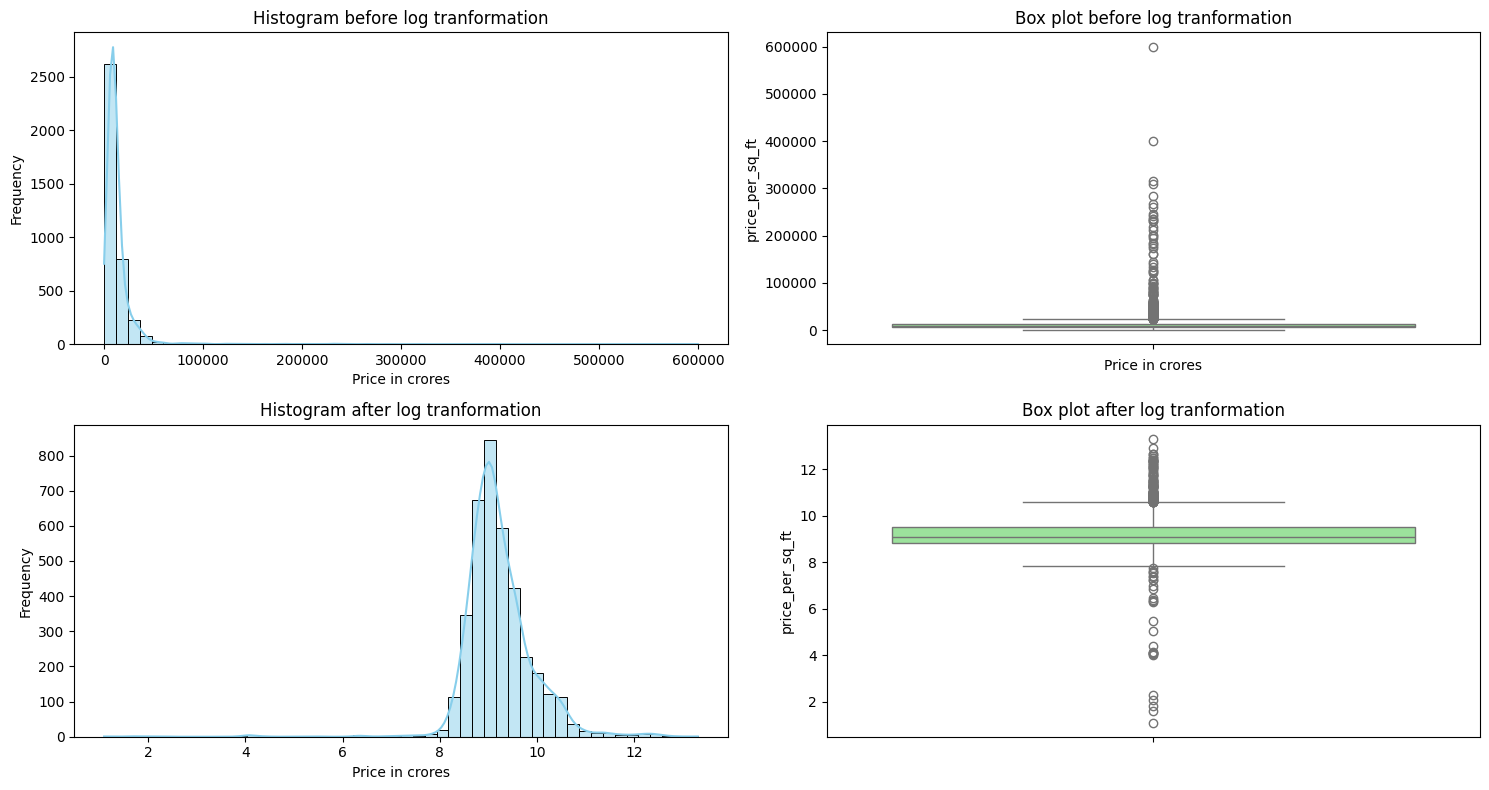

In [38]:
# distribution of prices original and after tranformation 

# histogram 
plt.figure(figsize= (15, 8))

plt.subplot(2,2,1)
sns.histplot(data['price_per_sq_ft'], bins = 50, kde = True, color = 'skyblue') 
plt.title("Histogram before log tranformation")
plt.xlabel("Price in crores")
plt.ylabel("Frequency")

# box plot without tranformation 
plt.subplot(2,2, 2)
sns.boxplot(data['price_per_sq_ft'], color = 'lightgreen')
plt.title("Box plot before log tranformation")
plt.xlabel("Price in crores")

# histogram after log tranformation
plt.subplot(2,2, 3)
sns.histplot(np.log1p(data['price_per_sq_ft']), bins = 50, kde = True, color = 'skyblue') 
plt.title("Histogram after log tranformation")
plt.xlabel("Price in crores")
plt.ylabel("Frequency")

# boxplot after log tranformation
plt.subplot(2, 2,4 )
sns.boxplot(np.log1p(data['price_per_sq_ft']), color = 'lightgreen')
plt.title("Box plot after log tranformation")
plt.tight_layout()
plt.show()




In [39]:
# shapiro wilk test on the tranformed data 

tranformed_pricepersqft = np.log1p(data['price_per_sq_ft'].dropna().values)

sw_test, pvalue = stats.shapiro(tranformed_pricepersqft)
print(f"Test statisic for the shapiro wilk test is: {sw_test}")
print(f"P value for the shapiro wilk test is {value}")
alpha = 0.05 

if pvalue < 0.05: 
    print("Even after log tranformation the data is not following the normal distribution")
else: 
    print("After log tranfomation the data now follows the normal distribution")

Test statisic for the shapiro wilk test is: 0.823781506074323
P value for the shapiro wilk test is 340
Even after log tranformation the data is not following the normal distribution


In [40]:
# outliers analysi

iqr = data.price_per_sq_ft.quantile(0.75) - data.price_per_sq_ft.quantile(0.25)
lower_bound, upper_bound = (data.price_per_sq_ft.quantile(0.25) - (1.5*iqr)), (data.price_per_sq_ft.quantile(0.75) + (1.5*iqr))
print(f"Lower bound is {lower_bound} and upper bound is {upper_bound}")

outliers = data[(data.price_per_sq_ft < lower_bound) | ((data.price_per_sq_ft > upper_bound))]
outliers.shape

Lower bound is -3653.5 and upper bound is 24222.5


(370, 23)

Observation: 
- Various critical values at differnt significance level indicates the data is following normal distribution or not at that significance level. 
- A very high critical value at 1% significance level indicates that even at 1% the data is not following the normal distribution which means there is a heavy tail. 
This indicates that there are high values and frequency of outliers. 
- This can be validated from the histogram and box plot as well. 
- Skewness = 11, indicates that our data has right tail and it is positive skewed. This is validated from the histogram as well. 
- Kurtosis is very high, this indicates there are high number of outliers present in our data. 
- The mean per square feet prices of the flat is almost 13000 rupees. This indicates that the flats are on the expensive side in gurgaon. 
- Minimum per square feet price is 2 which is quite abnormal we we look at the other quantiles values. This means that there is some flat which is priced at 2 rupees per square feet, which has to be an outlier or a wrong inforamation. 
- Standard deviation is very high at almost 23000. This indicates that there is large variablity in our data. 
- 25% of the flats have per square feet price less than 6800. 
- 50% of the flats have per square feet price less than 9000, which is actually a better representation of the flats in gurgaon. 
- 75% of the flats have per square feet price less than 14000
- Maximum per square feet price is 600000 which is significantly greater than the rest 75% of the prices which indicates the presence of outliers.Also this is a very high price for any flat in any city. 
- There are 19 missing values in the data. 
- To make this column fit for our machine learning model we can either transform this column using log tranformation or completely remove the outliers.  
- Log tranformation has significanly reduced the number of outliers in the data which can be verified from before-after box plots and histgram. 
- Although the log tranformed data may look like the normal distribution from the histogram it's not completely normal which can be verified from the shapiro wilk test. 
- This log tranformation will help in improved model performance 
- There are almost 370 rows with outliers. So we can't directly remove the outliers as this is a signifcantly greater portion of the data, therefore we will look for other alternative methods. 

5.5 bedRoom

Quick glance of bedRoom
980     2
2804    2
1480    9
3297    2
1438    3
960     3
691     5
1278    3
1582    5
2228    4
Name: bedRoom, dtype: int64
Cardinality in the bedRoom column: 
21
bedRoom
3     1530
2      977
4      686
5      222
1      134
6       82
9       45
8       32
7       31
12      26
10      21
16      12
13       4
19       2
18       2
11       2
14       1
21       1
36       1
34       1
20       1
Name: count, dtype: int64
Number of missing values in the bedRoom column: 
0


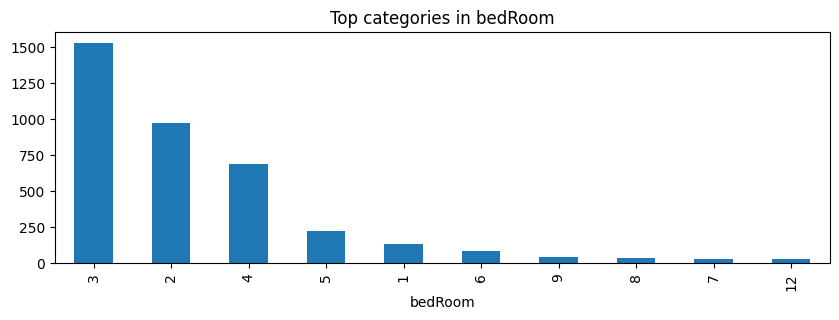

In [41]:
cat_col_summary(data, 'bedRoom')

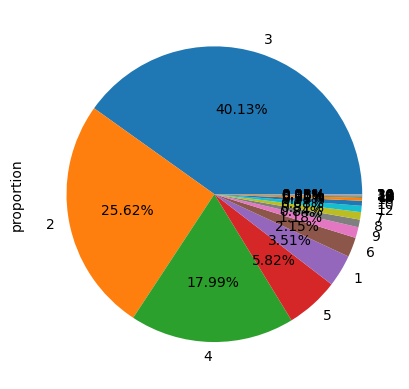

In [42]:
data['bedRoom'].value_counts(normalize=True).plot(kind = 'pie', autopct = "%0.2f%%")
plt.show()

Observation 
- This is a categorical column with 21 different categories. 
- Most of the values are in the categories of 1, 2, 3, 4, 5 and 6 but there are some properties with very high number of bedrooms. This indicates the presence of outliers. 
- There aren't any missing values in this column. 
- 40% of the properties have 3 bedrooms. 
- 25% of the properties have 2 bedroomms. 
- 18% of the properites have 4 bedrooms and 
- 3.5% of the properties have 1 bedrooms. 
- Rest 12% of properties have more than 4 bedrooms. 
- This also aligns with our earlier observation that some properties have high prices and that may be possible because there are higher number of bedrooms. Usually properites with high number of bedrooms will be larger on size and therefore they are more expensive than the others. 

5.6 bathroom 

Quick glance of bathroom
3562    3
1322    4
2332    2
3365    3
2933    2
3338    1
44      6
510     4
1340    3
1714    3
Name: bathroom, dtype: int64
Cardinality in the bathroom column: 
21
bathroom
3     1116
2     1095
4      839
5      301
1      169
6      120
7       43
9       42
8       26
12      21
10      11
16       8
18       4
13       4
11       4
20       3
17       3
14       1
21       1
36       1
34       1
Name: count, dtype: int64
Number of missing values in the bathroom column: 
0


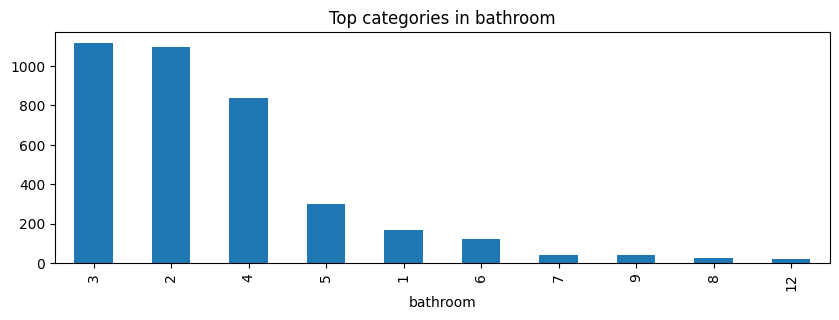

In [43]:
cat_col_summary(data, 'bathroom')

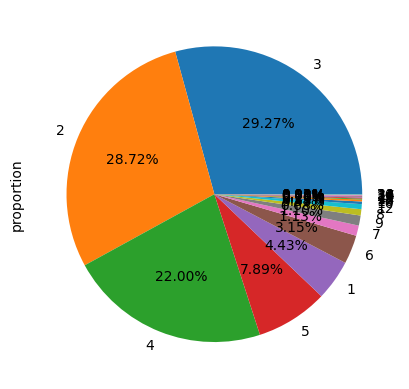

In [44]:
data.bathroom.value_counts(normalize=True).plot(kind = 'pie', autopct = "%0.2f%%")
plt.show()

Observations
- bathroom column represents the number of bathrooms in a property. 
- It has 21 different categories, which represent the number of bathrooms in a property i.e in our data there are properties which have the bathrooms in the range of 1 to 21. 
- Most of the flats have bathroom in the range of 1-6. 
- Pie chart shows that, there are 29% of the properties which have 3 bathrooms. 
- 28% of the properities have 2 bathrooms. 
- 22% of the properties have 4 bathrooms. 
- 7% of the properties have 5 bathrooms and 
- 4.5% of the properties have 1 bathrooms
- Rest have more than 5 bathrooms, which aligns with our earlier observations that some properties have higher prices because they have more number of bedrooms and bathrooms. 
- These relationship between number of bedrooms and bathrooms indicates the presence of multicollinearity. 

5.7 balcony

Quick glance of balcony
642      2
1514     3
2049     2
1159    3+
1487    3+
2286    3+
2303     2
1326     3
3532    No
3589     2
Name: balcony, dtype: object
Cardinality in the balcony column: 
5
balcony
3+    1188
3     1097
2      925
1      403
No     200
Name: count, dtype: int64
Number of missing values in the balcony column: 
0


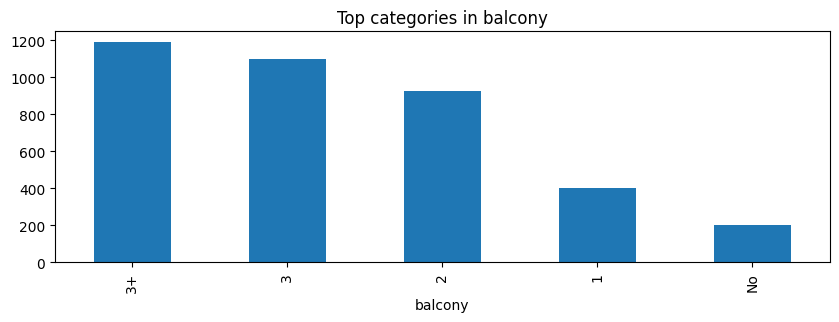

In [45]:
cat_col_summary(data, 'balcony')

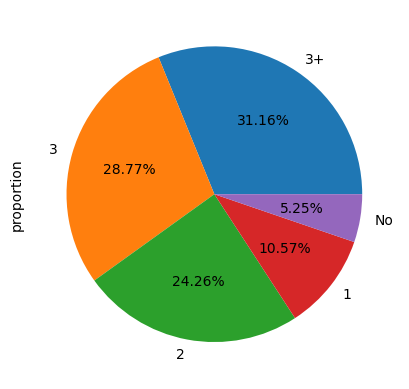

In [46]:
data.balcony.value_counts(normalize=True).plot(kind = 'pie', autopct = '%0.2f%%')
plt.show()

Observation: 
- This column represents the number of balconies in a property. 
- In our data, we have the record of properties which have balconies in the range of 0-3+. 
- There aren't any missing value in our data. 
- 31% of the properties have more than 3 balconies. 
- 29% of the properties have 3 balconies. 
- 24% of the properties have 2 balconies. 
- 10.5% of the properties have 1 balcony. 
- There are 5% of the properties without any balcony. 

5.8 floorNum

Quick glance of floorNum
1993    22.0
1732     4.0
189      1.0
2292     3.0
1967     4.0
3705     5.0
594     13.0
212     11.0
2961     4.0
3611     3.0
Name: floorNum, dtype: float64
Cardinality in the floorNum column: 
44
floorNum
3.0     537
2.0     533
1.0     390
4.0     327
8.0     197
6.0     184
7.0     181
10.0    180
5.0     172
9.0     162
12.0    159
0.0     134
11.0    114
14.0    112
15.0     80
16.0     53
17.0     47
13.0     42
18.0     37
19.0     33
20.0     26
21.0     16
23.0     14
22.0     13
24.0     11
25.0      9
27.0      8
26.0      5
30.0      5
33.0      4
28.0      4
29.0      3
31.0      3
34.0      2
43.0      2
39.0      2
32.0      2
35.0      2
51.0      1
38.0      1
44.0      1
40.0      1
41.0      1
45.0      1
Name: count, dtype: int64
Number of missing values in the floorNum column: 
2


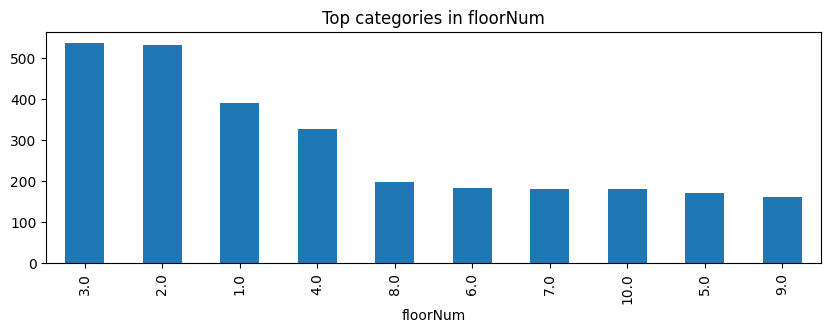

In [47]:
cat_col_summary(data, 'floorNum')

In [48]:
data['floorNum'].value_counts(normalize= True).head(10).cumsum()

floorNum
3.0     0.140908
2.0     0.280766
1.0     0.383102
4.0     0.468906
8.0     0.520598
6.0     0.568880
7.0     0.616374
10.0    0.663605
5.0     0.708738
9.0     0.751246
Name: proportion, dtype: float64

Quick Glance
1151     1.0
2722     6.0
3055    12.0
1379     0.0
2134    13.0
47       9.0
3028    14.0
2509     2.0
2416     4.0
3078    11.0
Name: floorNum, dtype: float64

Basic summary of the data: 
count    3811.000000
mean        6.652847
std         5.991852
min         0.000000
25%         2.000000
50%         4.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64
Skewness: 	1.75 
Kurtosis: 	4.78
Number of missing values in the column: 
2
Quantile analysis
0.01     0.0
0.05     1.0
0.95    18.0
0.99    27.0
Name: floorNum, dtype: float64
IQR:  8.0

Step 1:Setting up the hypothesis.
Null hypothesis: Data is Normally Distributed
Alternate hypothesis: Data is Not Normally Distributed
Step 2: Setting up the significant level for the test.
Significance Level:  0.05
Step 3: Performing the test.
Test Statistic:  0.843
Step 4: Calculating the p-value
Pvalue =  0.0
Interpration
Since p-valeu is less than 0.05 we reject the null hypothesis at the significance l

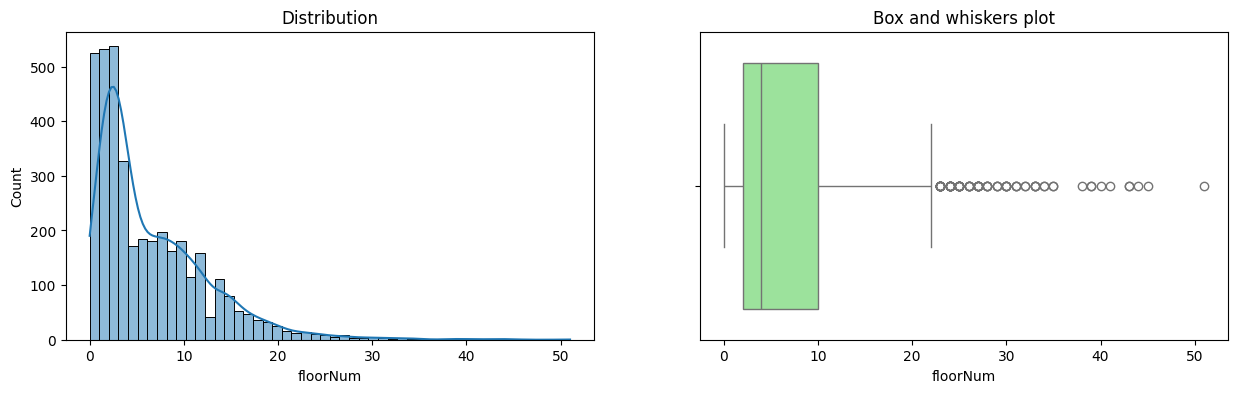

In [49]:
num_col_summary(data, 'floorNum')

Obervation: 
- This columns explains about the floor position of the property i.e. on which floor the property exists. 
- There are almost 75% of the properties which are located on 10 or less floors. 
- If we consider that the properties which are located on the 10+ floors as a high rise building then 25% of the properties are located on a high rise buildings. 
- Mean value indicates that on an average properties are located on the 6th floor. 
- Min value 0 indicates that there are properties availale on the ground floor as well. 
- 25% of the properties lie upto 2nd floor. 
- 50% of the properties lie upto 4th floor. 
- 75% of the property lie upto 10th floor 
- Max 51 indicates that there is a property located on the high rise buildings which has atleast 51 floors. 
- Box plot indicating that the majority of the properties lies between ground and 25th floor. 
- Properties are commonly at the 4th floor while 3rd floor being the most frequent. 
- There are few properties located on the higher floors but their frequency is very less. 
- Box plot reveals that the properties are concentrated from 2nd to 10th floor which aligns with our previous observation. 
- Properties beyond 25 floor are possible indication of outliers. 


5.9 facing

Quick glance of facing
2713           NaN
3133            na
2658    north-east
1385         North
1682         south
3398          East
655             na
2526         north
1962    South-East
951            NaN
Name: facing, dtype: object
Cardinality in the facing column: 
17
facing
na            812
north-east    488
east          471
north         290
south         201
west          178
East          176
North-East    157
north-west    155
south-east    143
south-west    131
North         109
West           72
North-West     44
South-East     39
South          34
South-West     22
Name: count, dtype: int64
Number of missing values in the facing column: 
291


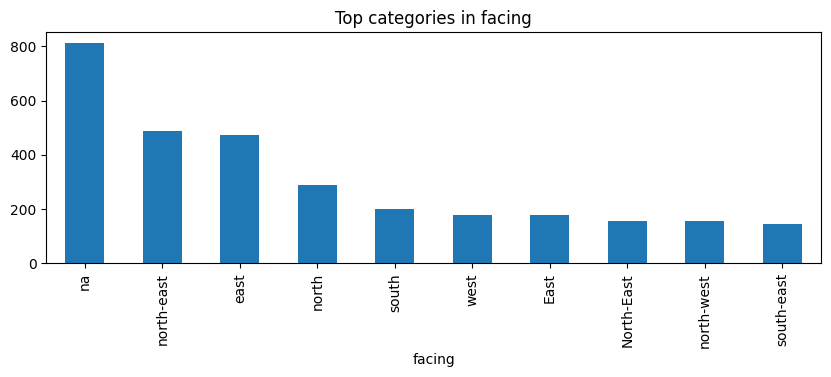

In [50]:
cat_col_summary(data, 'facing')

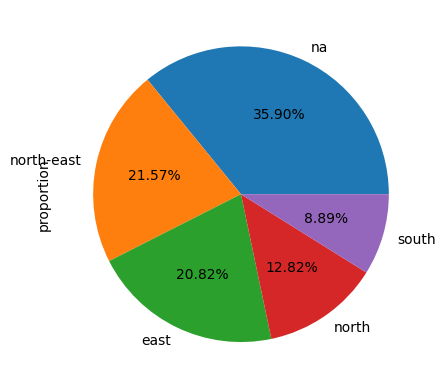

In [51]:
data.facing.value_counts(normalize= True).head().plot(kind= 'pie', autopct = "%0.2f%%")
plt.show()

In [52]:
data['facing'].fillna("na", inplace = True)

/var/folders/_r/sndd4_s924d6z4fgsvt_v31r0000gn/T/ipykernel_44617/176040259.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['facing'].fillna("na", inplace = True)


Observation: 
- `facing` in a property is a representation of the direction of the property or it's main entrance. In a country like India, vastu is an important factor.  
- There are 35% of the na values and 291 missing values. so i will replace the missing values with na. 
- After imputing the missing value we can see that there are almost 36% missing data in this column. 
- North and East facing properties are preferred, so this can be used in our analyis to check if the price of these properties tends to be more expensive that the others. This can be revealed when we do bivariate analysis. 


5.10 agePossession

Quick glance of agePossession
1345        Relatively New
3298        Relatively New
3029        Moderately Old
876           New Property
1440             undefined
968     Under Construction
2613          New Property
1156        Moderately Old
2645        Moderately Old
2481          New Property
Name: agePossession, dtype: object
Cardinality in the agePossession column: 
6
agePossession
Relatively New        1671
New Property           612
Moderately Old         592
Old Property           338
undefined              331
Under Construction     269
Name: count, dtype: int64
Number of missing values in the agePossession column: 
0


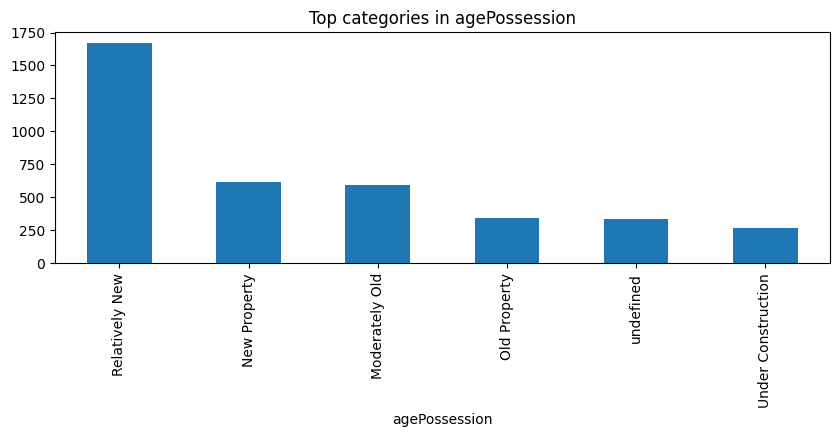

In [53]:
cat_col_summary(data, 'agePossession')

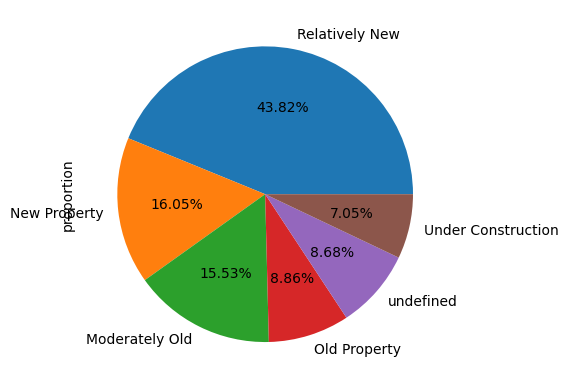

In [54]:
data.agePossession.value_counts(normalize= True).plot(kind = 'pie', autopct = "%.2f%%")
plt.show()

Observation: 
- This is a representation of the age of the property. 
- Almost 44% of the properties are `Relatively New` means they are 1-2 years old. 
- 16% of the properties are very new. 
- 15% of the properties are old but not very old. 
- Almost 9% of the properties are Old. 
- 7% of the properites are `Under Construction` and ready to be sold. 
- Around 8% of the property age is not defined. 

5.11 super_built_up_area

In [55]:
data[['super_built_up_area', 'built_up_area', 'carpet_area']].isnull().sum()

super_built_up_area    1920
built_up_area          2028
carpet_area            1886
dtype: int64

Quick Glance
1547       NaN
2628    2191.0
3504       NaN
1584       NaN
2676       NaN
2731       NaN
3163    1385.0
2173    1650.0
854        NaN
3477       NaN
Name: super_built_up_area, dtype: float64

Basic summary of the data: 
count     1893.000000
mean      1920.915240
std        765.408479
min         89.000000
25%       1465.000000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64
Skewness: 	1.82 
Kurtosis: 	10.21
Number of missing values in the column: 
1920
Quantile analysis
0.01     522.88
0.05     750.00
0.95    3185.00
0.99    4633.44
Name: super_built_up_area, dtype: float64
IQR:  750.0

Step 1:Setting up the hypothesis.
Null hypothesis: Data is Normally Distributed
Alternate hypothesis: Data is Not Normally Distributed
Step 2: Setting up the significant level for the test.
Significance Level:  0.05
Step 3: Performing the test.
Test Statistic:  0.8942
Step 4: Calculating the p-value
Pvalue =  0.0
Interpration
Sin

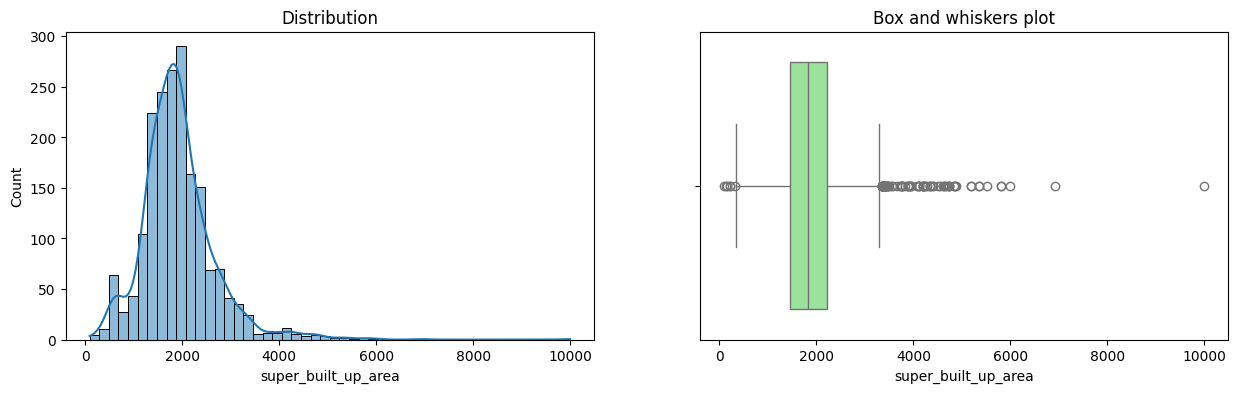

In [56]:
num_col_summary(data, 'super_built_up_area')

Observation: 
- There are 1920 missing values in this column, which almost half of our data. 
- Mean = 1920.915240: Indicates that on an average super built up area of the properties are around 1900. 
- Min = 89.00: Indicates that there is a property which is possibly consists of only one room. This is quite inaccurate with the kind if properties available in Gurgaon. This is possibly the indication of outliers. In the step of feature engineering the areas were on a different scale so may be this is an indication that there is some error during the unit conversion. 
- 25% of the properties have super built up area below 1465,  50% of the properties are below 1828 and 75% of the properties are below 2215. 
- The maximum `super_built_up_area` of a property is `10000` which is possibly a villa or a penthouse. 
- Data is moderately right skewed. 
- Box and whisker plot indicates that most of the properties super built up area in a range of 1000 to 3000 square feet. 
- There are some properties which have singnificanly large area than the others due to which this data is right skewed. 
- There are several data points which are beyond the whiskers which indicates that there are possible outliers present in the data. 

5.12 built_up_area

Quick Glance
859     1548.0
2959    2017.0
2986       NaN
3146     650.0
2470       NaN
3457    2250.0
274     2610.0
416       50.0
3133    1210.0
1223       NaN
Name: built_up_area, dtype: float64

Basic summary of the data: 
count      1785.000000
mean       2322.882145
std       17473.103753
min           2.000000
25%        1000.000000
50%        1616.000000
75%        2367.000000
max      737147.000000
Name: built_up_area, dtype: float64
Skewness: 	41.74 
Kurtosis: 	1756.21
Number of missing values in the column: 
2028
Quantile analysis
0.01      60.0
0.05     215.0
0.95    4646.0
0.99    7580.0
Name: built_up_area, dtype: float64
IQR:  1367.0

Step 1:Setting up the hypothesis.
Null hypothesis: Data is Normally Distributed
Alternate hypothesis: Data is Not Normally Distributed
Step 2: Setting up the significant level for the test.
Significance Level:  0.05
Step 3: Performing the test.
Test Statistic:  0.0265
Step 4: Calculating the p-value
Pvalue =  0.0
Interpration
Since p-valeu

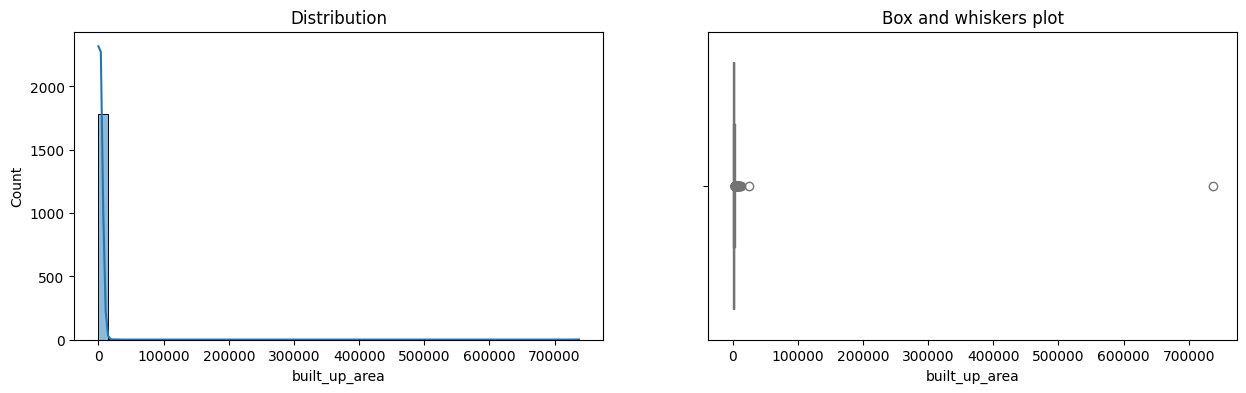

In [57]:
num_col_summary(data, 'built_up_area')

Observations: 
- There are 2028 missing values in this column which almost half of our data. 
- Mean = 2322.88 indicates that on average properties in gurgaon have built up area of around 2300. 
- Standard deviation = 17473.10 indicates that there is large variability in the built up area of the properties. 
- Minimum built up area is 2.0, which is possibly an outlier or error in unit conversion during the feature engineering. 
- 25% of the properties have built up area below 1000. 
- 50% of the properties have built up area below 1620. 
- 75% of the properties have built up area below 2367. 
- Maximum built up area of a property is 737147.00 which is possibly a big mansion or an indication of error during the unit conversion process in feature engineering. 
- Data is highly right skewed. 
- So the property which has built up area of 737147 is possibly an outlier because in Box and whiskers plot we can see that there is only value at that range. 

5.12 carpet area 

Quick Glance
243         NaN
3789        NaN
1494    1765.73
2920    1310.00
1831    1240.00
1615    1800.00
3423    1056.00
708     1200.00
886         NaN
1290     394.00
Name: carpet_area, dtype: float64

Basic summary of the data: 
count      1927.000000
mean       2489.090404
std       22473.689310
min          15.000000
25%         822.000000
50%        1280.000000
75%        1782.000000
max      607936.000000
Name: carpet_area, dtype: float64
Skewness: 	24.69 
Kurtosis: 	622.32
Number of missing values in the column: 
1886
Quantile analysis
0.01      87.56
0.05     339.30
0.95    2941.60
0.99    6664.90
Name: carpet_area, dtype: float64
IQR:  960.0

Step 1:Setting up the hypothesis.
Null hypothesis: Data is Normally Distributed
Alternate hypothesis: Data is Not Normally Distributed
Step 2: Setting up the significant level for the test.
Significance Level:  0.05
Step 3: Performing the test.
Test Statistic:  0.0357
Step 4: Calculating the p-value
Pvalue =  0.0
Interpration
Since p

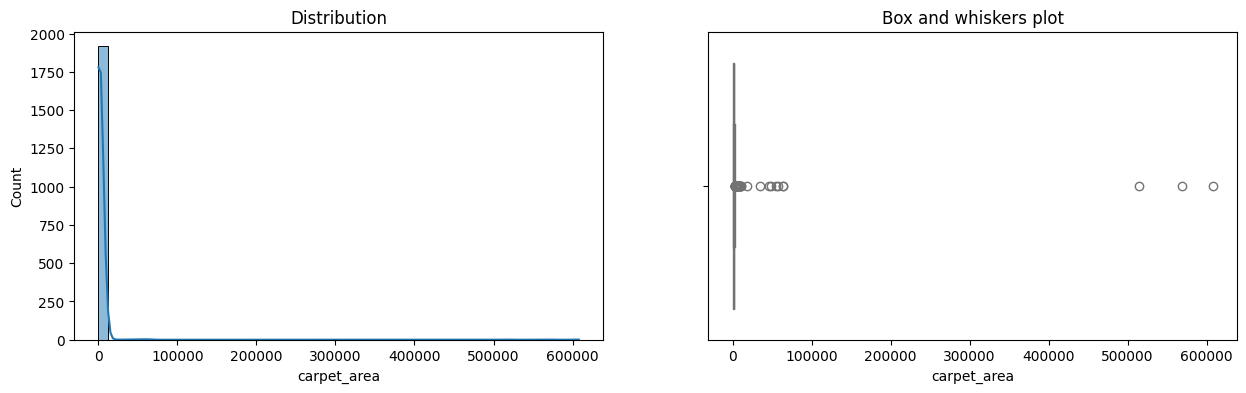

In [58]:
num_col_summary(data, 'carpet_area')

Observations: 
1. There are 1886 missing values in this column. 
2. On an average there is carpet area of 2489 sq ft. which is larger than the mean built_up area. This is the first indication of anamoly. 
3. Standard deviation = 22473 indicates that there is high variability in the data. 
4. Minimum carpet area is 15 which indicates that there is an outlier because a property of this carpet area is not possible. This is possibly an outlier or an indication of the error during the unit conversion during the feture engineering. 
5. 25% of the properties have carpet area below 822, 50% of them are below 1280 and 75% of the properties are below 1782 square feet. 
6. Biggest property is having 607936 square feet carpet area which is possibly a big shopping complex, a multi storey builiding or an error during the unit conversion process during feature engineering. 
7. Due to presence of high values the data is highly right skewed. This is possibly due to the very large values present above 500000 square feet which we can observe in the box and whiskers plot. 


5.13 additional rooms 

Axes(0.180637,0.53;0.116667x0.35)
Axes(0.454167,0.53;0.116667x0.35)
Axes(0.727696,0.53;0.116667x0.35)
Axes(0.180637,0.11;0.116667x0.35)
Axes(0.454167,0.11;0.116667x0.35)


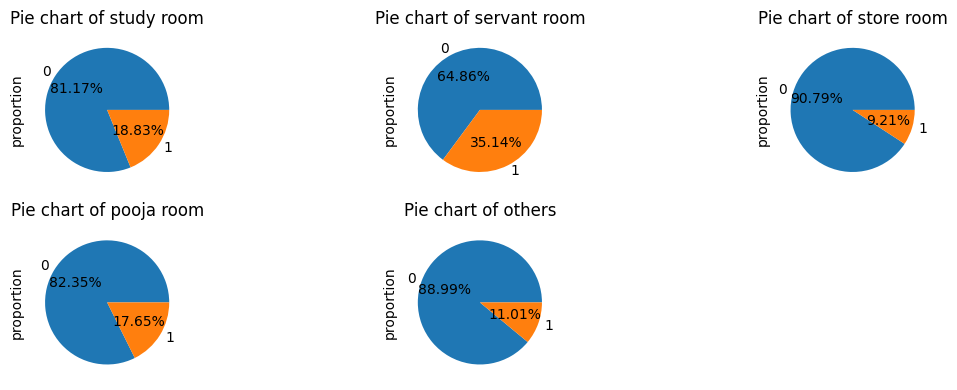

In [59]:
data.columns


additional_rooms_section = ['study room', 'servant room', 'store room', 'pooja room','others']

plt.figure(figsize= (12, 4))
for idx, rooms in enumerate(additional_rooms_section):
    plt.subplot(2, 3, idx+1)
    print(data[rooms].value_counts(normalize= True).plot(kind = 'pie', autopct = "%0.2f%%"))
    plt.title(f"Pie chart of {rooms}")
plt.tight_layout()
plt.show()
    

In [60]:
data[(data['study room'] == 1) & (data['servant room'] == 1)& (data['servant room'] == 1)& (data['store room'] == 1)& (data['pooja room'] == 1)].sample(3)

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_score
3854,flat,citizen apartment,sector 51,3.55,6826.0,5201.0,Built Up area: 5200 (483.1 sq.m.)Carpet area: 4700 sq.ft. (436.64 sq.m.),5,6,3+,11.0,north,Moderately Old,NaN,5200.0,4700.0,1,1,1,1,0,2,157
2837,flat,emaar palm gardens,sector 83,1.60,8648.0,1850.0,Super Built up area 1850(171.87 sq.m.),3,3,3+,6.0,east,Relatively New,1850.0,NaN,NaN,1,1,1,1,0,2,167
349,flat,puri diplomatic greens,sector 111,2.65,11963.0,2215.0,Super Built up area 2215(205.78 sq.m.),3,4,3+,19.0,south-east,Relatively New,2215.0,NaN,NaN,1,1,1,1,0,0,65


Observation: 
1. In almost 19% of the properties there is `Study Room`. 
2. Almost 20% of the properties have `Servent Room`. 
3. There are around 9% of the property which have a `Store room`. 
4. 17% of the property have `pooja room` and 11% of the properties have other additonal rooms. 
5. There are 130 such properties in which almost all kinds of additional rooms are present. 

5.14 furnishing types

In [61]:
import my_eda_functions

Quick glance of furnishing_type
3636    0
2166    1
953     0
1770    0
3251    2
1140    0
3864    0
2136    2
75      2
2       2
Name: furnishing_type, dtype: int64
Cardinality in the furnishing_type column: 
3
furnishing_type
0    2521
2    1081
1     211
Name: count, dtype: int64
Number of missing values in the furnishing_type column: 
0


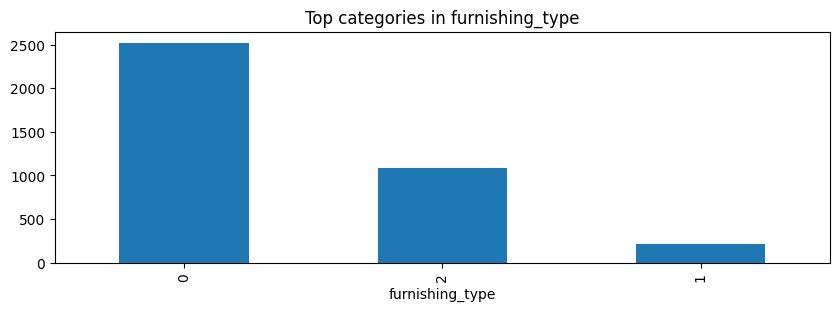

In [62]:
cat_col_summary(data, 'furnishing_type')

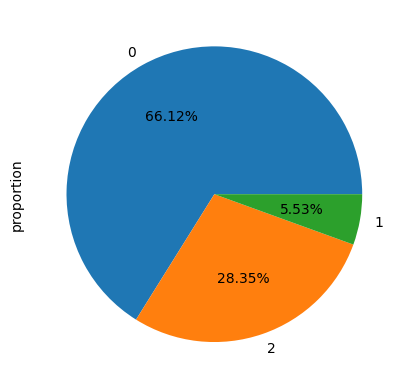

In [63]:
data['furnishing_type'].value_counts(normalize= True).plot(kind = 'pie', autopct = "%0.2f%%")
plt.show()

Observation: 
1. This column represents the furnished type of the property where 0 represents `Unfurnished`, 1 represents  `Semi-furnished` flat and 2 represents `Furnished flat`. 
2. Around 2500 flats are unfurnsihed which constitutes 66.12% of the properties. 
3. 211 flats are semi furnished which constitues 5.53% of the properties.
4. 1081 flats are fully furnieshed which represents 28.35% of the properties. 
  

5.15 Luxary Score 

Quick Glance
1977      0
1187    123
1390      0
551       0
3097     15
2624    111
1890     44
2105    128
3116     49
2751    174
Name: luxary_score, dtype: int64

Basic summary of the data: 
count    3813.000000
mean       69.833464
std        53.269005
min         0.000000
25%        29.000000
50%        56.000000
75%       108.000000
max       174.000000
Name: luxary_score, dtype: float64
Skewness: 	0.49 
Kurtosis: 	-0.86
Number of missing values in the column: 
0
Quantile analysis
0.01      0.0
0.05      0.0
0.95    174.0
0.99    174.0
Name: luxary_score, dtype: float64
IQR:  79.0

Step 1:Setting up the hypothesis.
Null hypothesis: Data is Normally Distributed
Alternate hypothesis: Data is Not Normally Distributed
Step 2: Setting up the significant level for the test.
Significance Level:  0.05
Step 3: Performing the test.
Test Statistic:  0.9274
Step 4: Calculating the p-value
Pvalue =  0.0
Interpration
Since p-valeu is less than 0.05 we reject the null hypothesis at the signifi

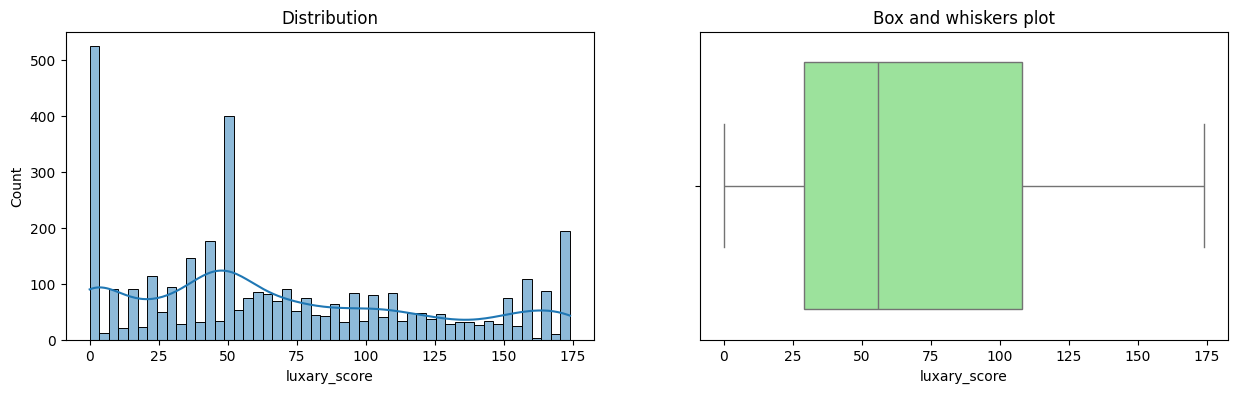

In [64]:
num_col_summary(data, 'luxary_score')

Observations: 
1. There aren't any missing values in this column.
2. Mean = 69 indicates the average luxary score of properties in gurgaon is 69. 
3. Standard Deviation = 53 indicates that there are high variability in the data. 
4. Min = 0 indicates there are some properties which don't even have some basic ameniteis. 
5. 25% of the properites have luxary score less than 30. 
6. 50% of the properties have luxary score less than 60. 
7. 75% of the properties have luxary score less than 110.
8. The maximum luxary score for any property is 174. 
9. Data distribution is somewhere multi modal, which shows there are some properties which have no amneties, some have basic amneties that's why there is a second peak and some are very luxarious properties with very high luxary scores. 
10. Box plot reveals that most of the properties have luxary score in between 30 to 120. 

Pandas profile report

In [65]:
!pip install ydata-profiling

In [66]:
from ydata_profiling import ProfileReport

In [67]:
profile = ProfileReport(data, title = "Pandas Profile Report", explorative= True)
profile.to_file("output_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 107.06it/s]
